In [1]:
print('start')
import torch
import numpy as np
from PIL import Image
import imagehash
import cv2
from shutil import rmtree
from os import mkdir,path
import matplotlib.pyplot as plt

%matplotlib inline


from torchvision import models, transforms

start


## prepare files

In [2]:
current_index=1

In [3]:
if path.isdir('test'):
    rmtree('test')
if path.isdir('results'):
    rmtree('results')

In [4]:
mkdir('test')
mkdir('test/small')
mkdir('test/crop')
mkdir('results')

In [5]:
color=(0,0,255)
thickness=2

In [6]:
small_picture = Image.open('data/{}_small.png'.format(current_index)).convert('RGB')
big_picture = Image.open('data/{}_big.png'.format(current_index)).convert('RGB')

## prepare model

In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = models.resnet50(pretrained=True).to(device)

# co robi to niżej?
model = torch.nn.Sequential(*(list(model.children())[:-2])).to(device)

In [8]:
# for i in range(0,256-64,5):
        
#     for j in range(0,256-64,5):
        
#         left=i
#         right = i+ 64
        
#         top=j
#         bottom = j+64
        
#         start_point=(left,top)
#         end_point=(right,bottom)
        
#         crop=big.crop((left,top,right,bottom))

# #         hash0=imagehash.average_hash(small)
#         hash1=imagehash.average_hash(crop)
#         for r in range(0,360,5):
            
#             small_test=small.rotate(r)
#             small_test=small_test.resize((64,64))
# #             small_test=small

#             hash0=imagehash.average_hash(small_test)
            
           
#             if hash0 - hash1 <12:
#                 cv_big = np.array(big_color.convert('RGB'))
#                 cv_big=cv_big[:,:,::-1].copy()

#                 result=cv2.rectangle(cv_big,start_point,end_point,color,thickness)
#                 result = cv2.cvtColor(result,cv2.COLOR_BGR2RGB)
#                 big_color=Image.fromarray(result)

#                 small_test.save('test/small/{}-{}-{}.png'.format(i,j,r))
#                 crop.save('test/crop/{}-{}-{}.png'.format(i,j,r))
                
#                 print(start_point,end_point)
#                 break
            
        



In [9]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

data_transforms = transforms.Compose([
#     transforms.CenterCrop(10),
    transforms.ToTensor(),
    normalize
])

## working with photos

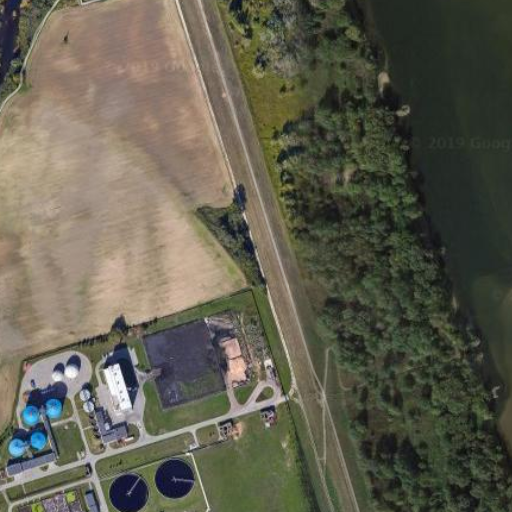

In [10]:
big_picture

In [11]:
big_picture.size

(512, 512)

In [12]:
big_picture_torch = data_transforms(big_picture).to(device)

In [13]:
big_picture_torch.size()

torch.Size([3, 512, 512])

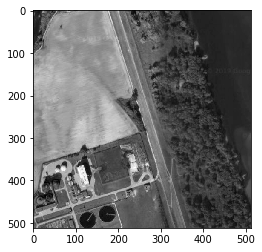

In [14]:
plt.imshow(big_picture_torch.numpy()[0], cmap='gray')

In [15]:
big_picture_torch.unsqueeze(0).size()

torch.Size([1, 3, 512, 512])

## resnet

In [16]:
resnet_out_big=model(big_picture_torch.unsqueeze(0)).squeeze()

In [17]:
resnet_out_big.size()

torch.Size([2048, 16, 16])

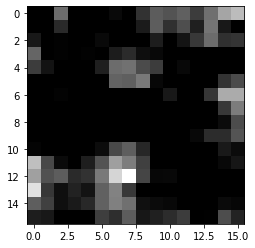

In [18]:
plt.imshow(resnet_out_big.detach().numpy()[0], cmap='gray')

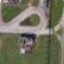

In [19]:
small_picture

In [20]:
small_picture.size

(64, 64)

In [21]:
small_picture.rotate(30).show()

In [22]:
small_pictures_rotated_torch = []
for rotate_angle in range(0,360,10):
    small_picture_rotated = small_picture.rotate(rotate_angle)
    small_pictures_rotated_torch.append(data_transforms(small_picture_rotated))

In [23]:
small_pictures_rotated_torch[0].size()

torch.Size([3, 64, 64])

In [24]:
# ,,Total number of training examples present in a single batch"
small_pictures_batch = torch.stack(small_pictures_rotated_torch).to(device)

# Czemu to device?

In [25]:
small_pictures_batch.size()

torch.Size([36, 3, 64, 64])

In [26]:
resnet_outs_small = model(small_pictures_batch)

In [27]:
resnet_outs_small.size()

torch.Size([36, 2048, 2, 2])

## model outputs

In [28]:
h_big, w_big = resnet_out_big.size()[1:]
h_big, w_big

(16, 16)

In [29]:
resnet_out_big.size()

torch.Size([2048, 16, 16])

In [30]:
for small_picture_resnet in resnet_outs_small:
    h_small, w_small = small_picture_resnet.size()[1:]
#     print(h_small,w_small)
    
    for h_shift in range(h_big-h_small):
        for w_shift in range(w_big-w_small):
            resnet_out_big_cut=resnet_out_big[:, h_shift:h_shift+h_small, w_shift:w_shift+w_small]
            similarity_measure = torch.mean((resnet_out_big_cut - small_picture_resnet) ** 2).item()
#             print(similarity_measure)
            if similarity_measure<0.5:
#                 print(similarity_measure,resnet_out_big_cut)
                print(resnet_out_big_cut.size(),w_shift,h_shift)
#                 plt.imshow(resnet_out_big_cut.detach().numpy()[0], cmap='gist_yarg')
                
            
        
        
    
    

torch.Size([2048, 2, 2]) 3 1
torch.Size([2048, 2, 2]) 4 1
torch.Size([2048, 2, 2]) 3 2
torch.Size([2048, 2, 2]) 4 2
torch.Size([2048, 2, 2]) 2 3
torch.Size([2048, 2, 2]) 3 3
torch.Size([2048, 2, 2]) 4 3
torch.Size([2048, 2, 2]) 2 4
torch.Size([2048, 2, 2]) 3 4
torch.Size([2048, 2, 2]) 4 4
torch.Size([2048, 2, 2]) 10 4
torch.Size([2048, 2, 2]) 11 4
torch.Size([2048, 2, 2]) 12 4
torch.Size([2048, 2, 2]) 1 5
torch.Size([2048, 2, 2]) 2 5
torch.Size([2048, 2, 2]) 3 5
torch.Size([2048, 2, 2]) 4 5
torch.Size([2048, 2, 2]) 9 5
torch.Size([2048, 2, 2]) 10 5
torch.Size([2048, 2, 2]) 11 5
torch.Size([2048, 2, 2]) 12 5
torch.Size([2048, 2, 2]) 1 6
torch.Size([2048, 2, 2]) 2 6
torch.Size([2048, 2, 2]) 3 6
torch.Size([2048, 2, 2]) 9 6
torch.Size([2048, 2, 2]) 10 6
torch.Size([2048, 2, 2]) 11 6
torch.Size([2048, 2, 2]) 12 6
torch.Size([2048, 2, 2]) 1 7
torch.Size([2048, 2, 2]) 2 7
torch.Size([2048, 2, 2]) 3 7
torch.Size([2048, 2, 2]) 9 7
torch.Size([2048, 2, 2]) 10 7
torch.Size([2048, 2, 2]) 11 7
tor

In [ ]:
print("end")